(968,) (968, 60)
(320,) (320, 60)
(320,) (320, 60)
(1288,) (1288, 60)
逻辑回归算法
训练集得分: 0.936983
验证集得分: 0.940625
测试集得分: 0.918750
测试集得分: 0.918750
[[156  11]
 [ 15 138]]
[[0.93 0.07]
 [0.1  0.9 ]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       171
           1       0.90      0.93      0.91       149

    accuracy                           0.92       320
   macro avg       0.92      0.92      0.92       320
weighted avg       0.92      0.92      0.92       320



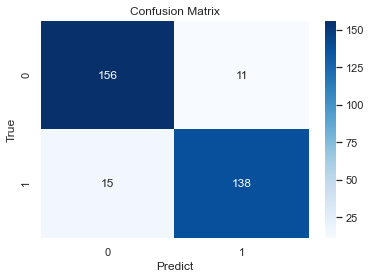

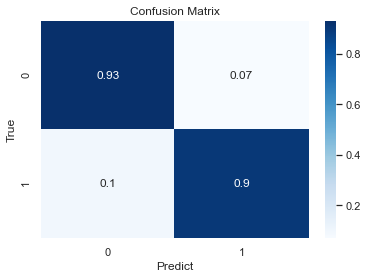

<Figure size 432x288 with 0 Axes>

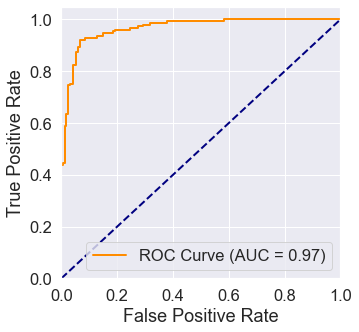

[0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1
 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0]


In [2]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# 评价指标函数 metrics
from sklearn import metrics
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# 评价指标函数 model_selection
from sklearn.model_selection import cross_val_score    # 交叉验证
from sklearn.model_selection import StratifiedKFold    # K折交叉验证
from sklearn.model_selection import GridSearchCV       # 网格搜索

# ------------------------------------------------------------------------------------------------------------------------------
# 算法：逻辑回归
from sklearn.linear_model import LogisticRegression    # sklearn - 逻辑回归算法


# 算法：支持向量机SVM
from sklearn import svm             # sklearn - 支持向量机SVM算法
from sklearn.svm import SVC
# from sklearn.svm import LinearSVC


# 算法：随机森林
from sklearn.ensemble import RandomForestClassifier           # sklearn - 随机森林


# 算法：决策树
from sklearn import tree           # sklearn - 决策树


# 算法：朴素贝叶斯
from sklearn.naive_bayes import GaussianNB           # sklearn - 朴素贝叶斯


# 算法：最小二乘法
from sklearn import linear_model   # sklearn - 最小二乘法

# ------------------------------------------------------------------------------------------------------------------------------
# 去除警告
import warnings
warnings.filterwarnings('ignore') #将警告滤掉

# 设置显示的行数和列数
pd.options.display.max_columns = None
pd.options.display.max_rows = None
# ------------------------------------------------------------------------------------------------------------------------------

# 读取CSV文件
train_sheet = pd.read_csv('G:/StudyFile/PycharmProjects/pythonStudy/FallDetection/data/biaozhun-train.csv')
train_data = train_sheet

val_sheet = pd.read_csv('G:/StudyFile/PycharmProjects/pythonStudy/FallDetection/data/biaozhun-validation.csv')
val_data = val_sheet

test_sheet = pd.read_csv('G:/StudyFile/PycharmProjects/pythonStudy/FallDetection/data/biaozhun-test.csv')
test_data = test_sheet

cross_sheet = pd.read_csv('G:/StudyFile/PycharmProjects/pythonStudy/FallDetection/data/biaozhun-cross.csv')
cross_data = cross_sheet


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
y_train = np.array(train_data['label'])
x_train = train_data.drop(['record', 'label'], axis=1)
print(y_train.shape, x_train.shape)

y_val = np.array(val_data['label'])
x_val = val_data.drop(['record', 'label'], axis=1)
print(y_val.shape, x_val.shape)

y_test = np.array(test_data['label'])
x_test = test_data.drop(['record', 'label'], axis=1)
print(y_test.shape, x_test.shape)

y_cross = np.array(cross_data['label'])
x_cross = cross_data.drop(['record', 'label'], axis=1)
print(y_cross.shape, x_cross.shape)



# 训练集train训练模型
print("逻辑回归算法")
clf = LogisticRegression(penalty='l2',C=60,solver='liblinear')          # 此处这个函数中有很多参数可供选择
clf = clf.fit(x_train,y_train)     # 训练模型


# 训练集train
score = clf.score(x_train,y_train)
print("训练集得分: %f"%score)

# 验证集validation
score = clf.score(x_val,y_val)
print("验证集得分: %f"%score)

score = clf.score(x_test, y_test)
print("测试集得分: %f"%score)



# ------------------------------------------------------------------------------------------------------------------------------
# # 测试集test
score = clf.score(x_test,y_test)
print("测试集得分: %f"%score)

# 预测测试集结果
y_pred = clf.predict(x_test)

# 混淆矩阵confusion_matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)

def plot_confusion_matrix(matrix):
  sns.set()
  f,ax=plt.subplots()
  print(matrix) #打印出来看看
  sns.heatmap(matrix,annot=True,fmt='g',cmap="Blues",ax=ax) #画热力图
  ax.set_title('Confusion Matrix') #标题
  ax.set_xlabel('Predict') #x轴
  ax.set_ylabel('True') #y轴

matrix=np.array(conf_mat)
plot_confusion_matrix(matrix)# 画原始的数据

matrix=matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
con_mat_norm = np.around(matrix, decimals=2)
plot_confusion_matrix(con_mat_norm)# 画比例数据

# ------------------------------------------------------------------------------------------------------------------------------

print(metrics.classification_report(y_pred,y_test))

y_score = clf.predict_proba(x_test)[:,1]

# ------------------------------------------------------------------------------------------------------------------------------

# roc/auc计算
fpr,tpr,threshold = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr,tpr)
sns.set(font_scale=1.5)
sns.set_style("darkgrid")

# 绘制roc曲线
plt.figure()
lw = 2
plt.figure(figsize=(5,5))
# plt.plot(fpr, tpr, color='red',
#          lw=lw, label='LR (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC Curve (AUC = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print(clf.predict(x_test))